In [5]:
# Put the imports here, this makes it easy to create a requirements.txt file
# later, which can be used by whoever is grading us to install everything!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import data_reader
data = data_reader.get_data_dict('./data/alzheimers_disease_data.csv')


Using Biological Features:
Entropy-Based Tree Accuracy: 0.61


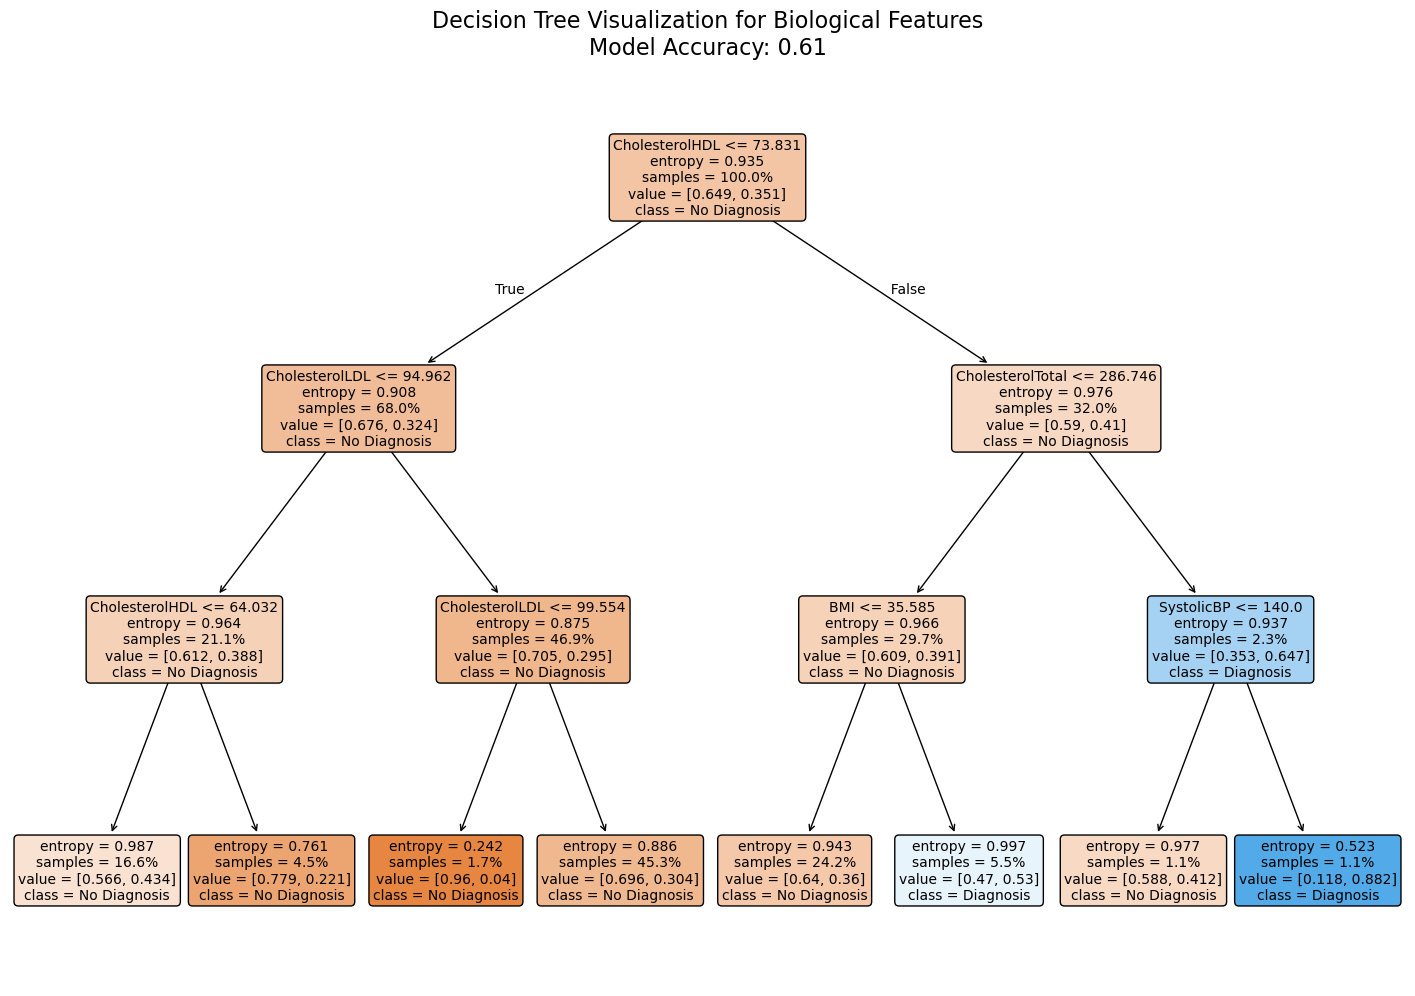


Using Cognitive Features:
Entropy-Based Tree Accuracy: 0.85


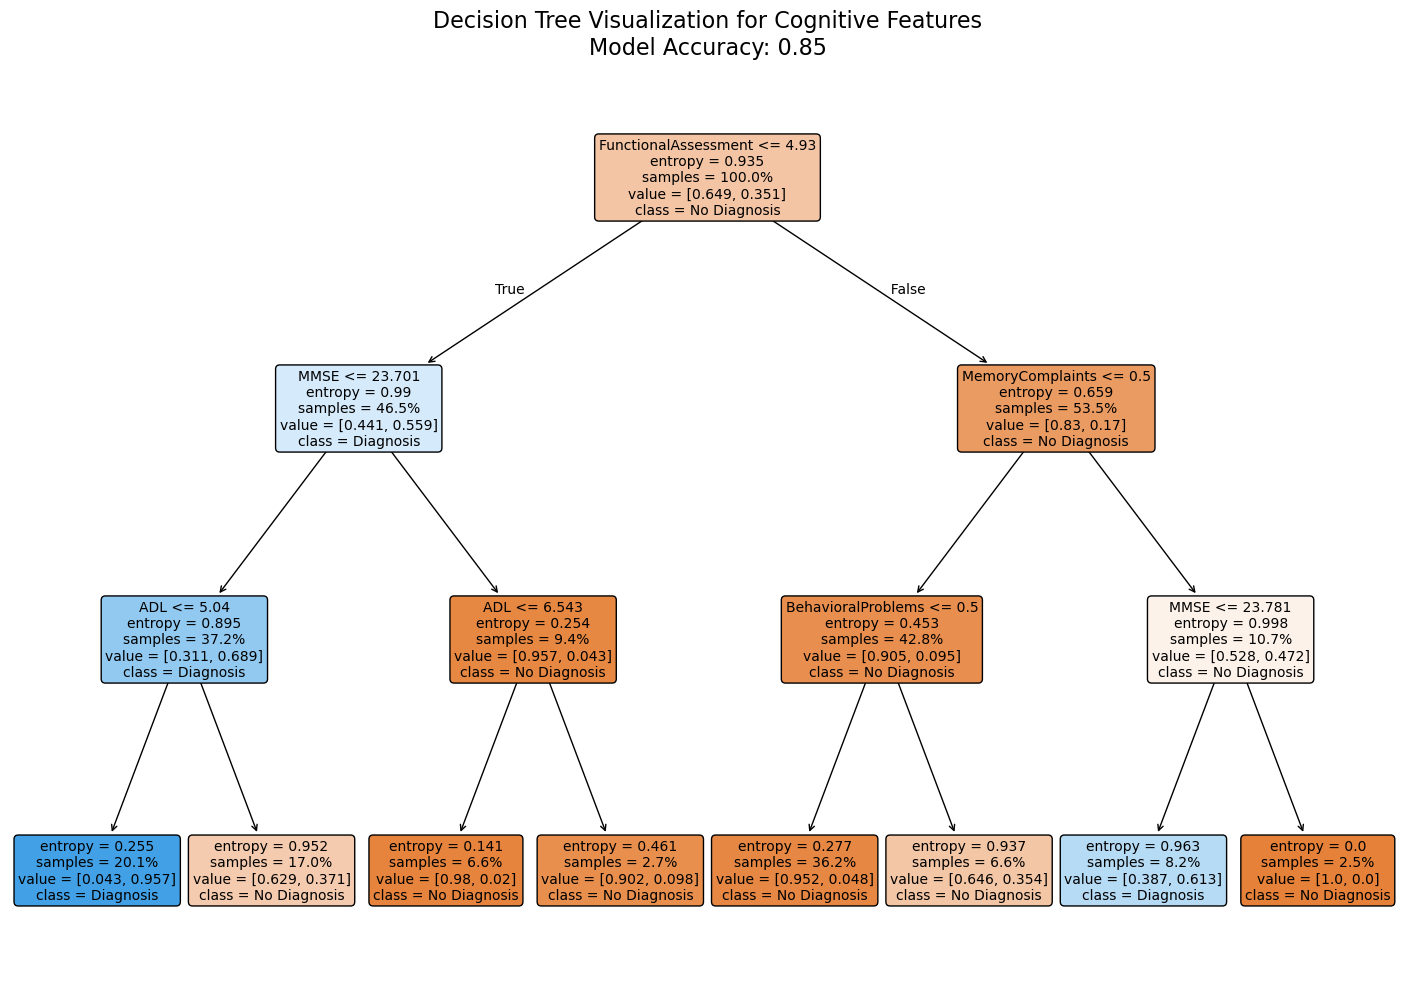


Using Lifestyle Features:
Entropy-Based Tree Accuracy: 0.62


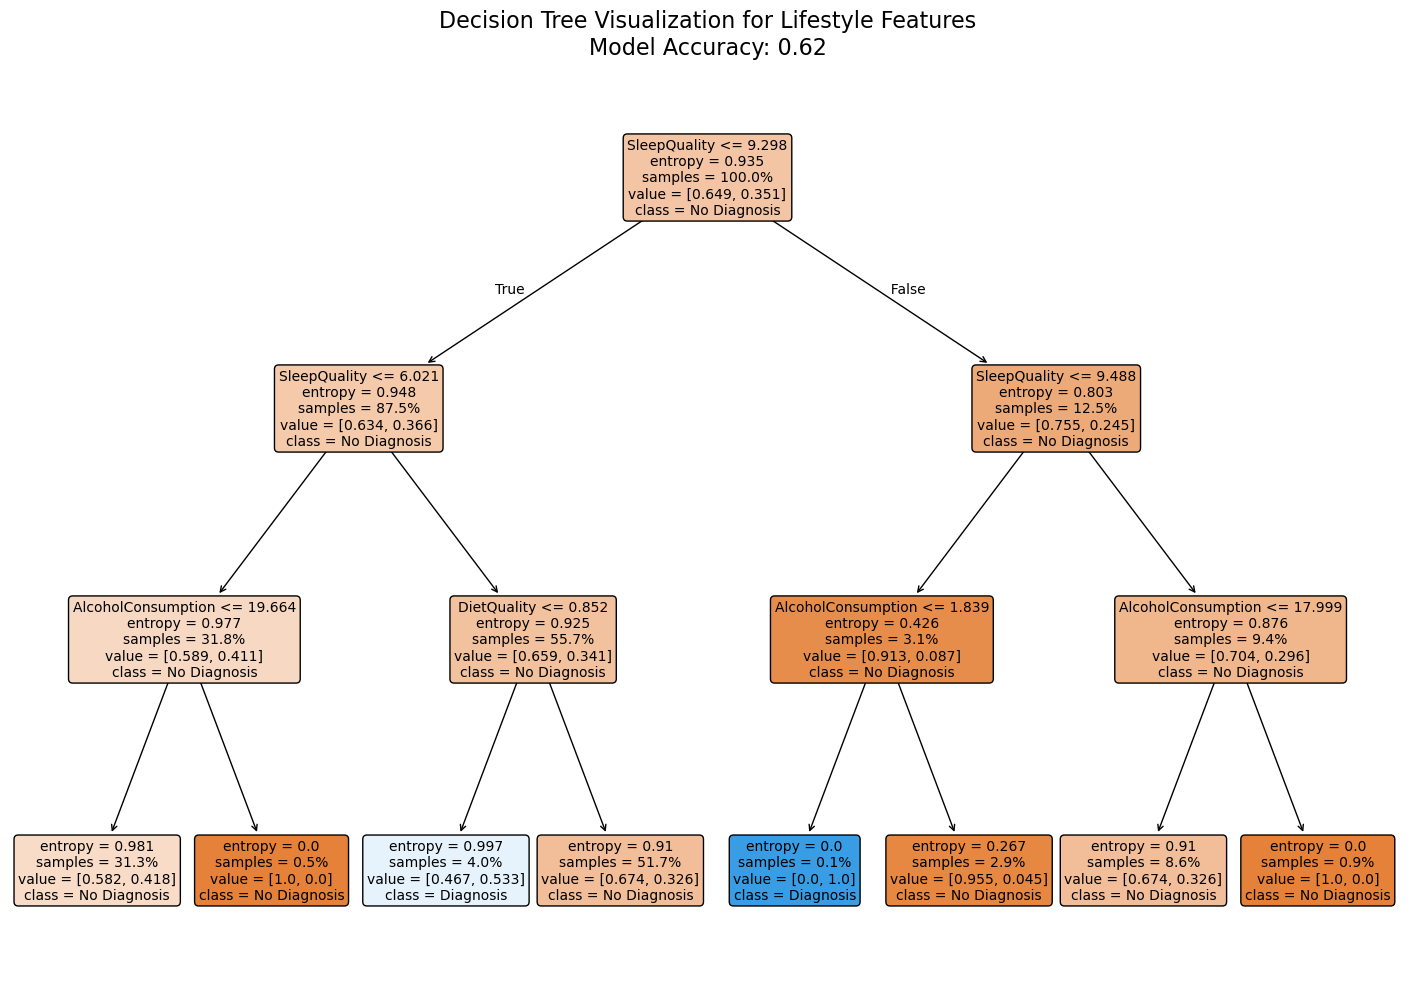

In [6]:

# define the feature sets
biological_features = [
    'Age', 'Ethnicity', 'Gender', 'BMI', 'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 'Diabetes', 'Hypertension',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']

cognitive_features = [
    'MMSE', 'FunctionalAssessment', 'MemoryComplaints',
    'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

lifestyle_features = [
    'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
    'DietQuality', 'SleepQuality', 'Depression', 'HeadInjury',
    'EducationLevel']

feature_sets = {'Biological Features': biological_features, 'Cognitive Features': cognitive_features,'Lifestyle Features': lifestyle_features}

df = pd.DataFrame({key: value for key, value in data.items() if key != 'DoctorInCharge'})

# Loop through each feature set
for feature_set_name, features in feature_sets.items():
    print(f"\nUsing {feature_set_name}:")
    
    X = df[features]  # Input features
    y = df['Diagnosis']  # Target label

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Decision Tree Classifier
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
        
    # simplify the tree with entropy criterion
    model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    model_entropy.fit(X_train, y_train)
    y_pred_entropy = model_entropy.predict(X_test)
    entropy_accuracy = accuracy_score(y_test, y_pred_entropy)
    print(f"Entropy-Based Tree Accuracy: {entropy_accuracy:.2f}")

    # Visualize the simpler tree
    plt.figure(figsize=(18, 12))
    plot_tree(
        model_entropy, 
        feature_names=features, 
        class_names=['No Diagnosis', 'Diagnosis'], 
        filled=True, 
        rounded=True, 
        fontsize=10,
        proportion=True
    )
    ax = plt.gca()  
    for arrow in ax.patches:
        arrow.set_linewidth(0.55)  

    plt.title(f"Decision Tree Visualization for {feature_set_name}\nModel Accuracy: {accuracy_score(y_test, y_pred_entropy):.2f}", fontsize=16)
    plt.show()
